In [3]:

# import libraries
import numpy as np
import torch
import torch.nn as nn

import matplotlib.pyplot as plt
import matplotlib_inline.backend_inline
matplotlib_inline.backend_inline.set_matplotlib_formats('svg')
import torch.nn.functional as F

In [29]:

# create a class for the model
class thenet(nn.Module):
  def __init__(self):
    super().__init__()

    ### input layer
    self.input = nn.Linear(100,100)
    
    ### hidden layer
    self.fc1 = nn.Linear(100,100)
    self.fc2 = nn.Linear(100,100)
    self.fc3 = nn.Linear(100,100)

    ### output layer
    self.output = nn.Linear(100,2)

  # forward pass
  def forward(self,x):
    x = F.relu( self.input(x) )
    x = F.relu( self.fc1(x) )
    x = F.relu( self.fc2(x) )
    x = F.relu( self.fc3(x) )
    return self.output(x)
     

In [30]:
net=thenet()
print(net)

thenet(
  (input): Linear(in_features=100, out_features=100, bias=True)
  (fc1): Linear(in_features=100, out_features=100, bias=True)
  (fc2): Linear(in_features=100, out_features=100, bias=True)
  (fc3): Linear(in_features=100, out_features=100, bias=True)
  (output): Linear(in_features=100, out_features=2, bias=True)
)


In [42]:
allweights=np.array([])
allbiases=np.array([])
for p in net.named_parameters():
  if 'bias' in p[0]:
    allbiases=np.concatenate((allbiases, p[1].data.numpy().flatten()),axis=0)
  elif 'weight' in p[0]:
    allweights=np.concatenate((allweights, p[1].data.numpy().flatten()),axis=0)
  
print(f'there are {len(allbiases)} bias parameters.')
print(f'there are {len(allweights)} weight parameters.')


there are 402 bias parameters.
there are 40200 weight parameters.


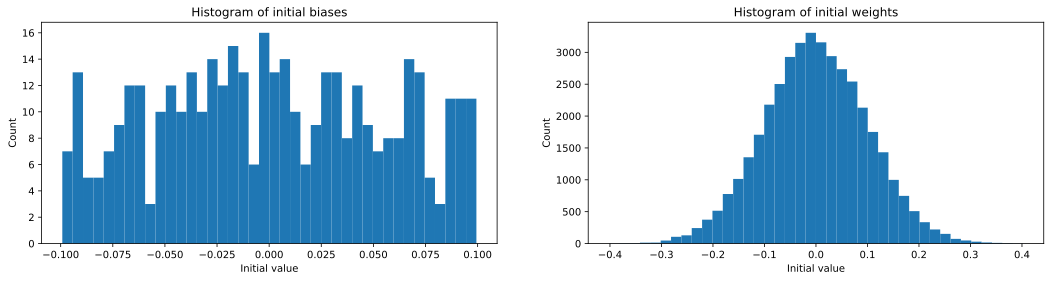

In [43]:
fig,ax=plt.subplots(1,2,figsize=(18,4))

ax[0].hist(allbiases,40)
ax[0].set_title('Histogram of initial biases')

ax[1].hist(allweights,40)
ax[1].set_title('Histogram of initial weights')

# plot adjustments common to all subplots
for i in range(2):
  ax[i].set_xlabel('Initial value')
  ax[i].set_ylabel('Count')


plt.show()




Text(0, 0.5, 'Probability')

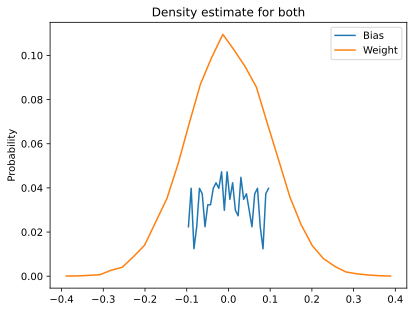

In [44]:
yB,xB=np.histogram(allbiases,30)
yW,Xw=np.histogram(allweights,30)

plt.plot((xB[1:]+xB[:-1])/2,yB/np.sum(yB),label='Bias')
plt.plot((Xw[1:]+Xw[:-1])/2,yW/np.sum(yW),label='Weight')
plt.title('Density estimate for both')
plt.legend()
plt.ylabel('Probability')


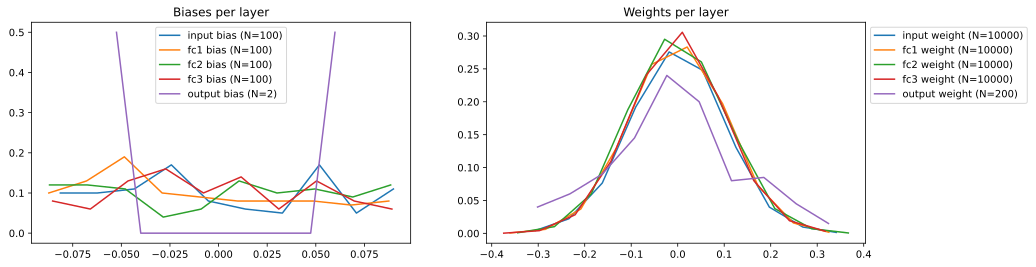

In [38]:


fig,ax = plt.subplots(1,2,figsize=(15,4))

for p in net.named_parameters():

  # get the data and compute their histogram
  thesedata = p[1].data.numpy().flatten()
  y,x = np.histogram(thesedata,10)

  # for the bias
  if 'bias' in p[0]:
    ax[0].plot((x[1:]+x[:-1])/2,y/np.sum(y),label='%s bias (N=%g)'%(p[0][:-5],len(thesedata)))

  # for the weights
  elif 'weight' in p[0]:
    ax[1].plot((x[1:]+x[:-1])/2,y/np.sum(y),label='%s weight (N=%g)'%(p[0][:-7],len(thesedata)))



ax[0].set_title('Biases per layer')
ax[0].legend()
ax[1].set_title('Weights per layer')
ax[1].legend(bbox_to_anchor=(1,1),loc='upper left')
plt.show()
     

In [35]:
print( net.output.bias.data )

tensor([-0.0011, -0.0595])


In [36]:
nn.Linear?


Init signature:
nn.Linear(
    in_features: int,
    out_features: int,
    bias: bool = True,
    device=None,
    dtype=None,
) -> None
Docstring:     
Applies a linear transformation to the incoming data: :math:`y = xA^T + b`

This module supports :ref:`TensorFloat32<tf32_on_ampere>`.

On certain ROCm devices, when using float16 inputs this module will use :ref:`different precision<fp16_on_mi200>` for backward.

Args:
    in_features: size of each input sample
    out_features: size of each output sample
    bias: If set to ``False``, the layer will not learn an additive bias.
        Default: ``True``

Shape:
    - Input: :math:`(*, H_{in})` where :math:`*` means any number of
      dimensions including none and :math:`H_{in} = \text{in\_features}`.
    - Output: :math:`(*, H_{out})` where all but the last dimension
      are the same shape as the input and :math:`H_{out} = \text{out\_features}`.

Attributes:
    weight: the learnable weights of the module of shape
        :math:`(

In [22]:

# Let's test whether the numbers match our prediction from the formula

# empirical bias range
biasrange = [ torch.min(net.fc1.bias.data).item(), torch.max(net.fc1.bias.data).item() ]
biascount = len(net.fc1.bias.data)

# theoretical expected value
sigma = np.sqrt(1/biascount)

# drum rolllllll.....
print('Theoretical sigma = ' + str(sigma))
print('Empirical range = ' + str(biasrange))
     

Theoretical sigma = 0.1
Empirical range = [-0.09939698129892349, 0.09681058675050735]


In [41]:

# create a new instance of the model
net = thenet()

# change the weights (leave biases as Kaiming [default])
for p in net.named_parameters():
  if 'weight' in p[0]:
    nn.init.xavier_normal_(p[1].data)

In [28]:
# Let's test whether the numbers match our prediction from the formula

# empirical weight standard deviation
weightvar   = torch.var(net.fc1.weight.data.flatten()).item()
weightcount = len(net.fc1.weight.data)

# theoretical expected value
sigma2 = 2 / (weightcount+weightcount)

# drum rolllllll.....
print('Theoretical sigma = ' + str(sigma2))
print('Empirical variance = ' + str(weightvar))

Theoretical sigma = 0.01
Empirical variance = 0.009814702905714512
